## Create a model for default on prediction using Logistic Regression

In [32]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

client = MongoClient("mongodb://localhost:27017/")
db = client["p2p_lending"]

data_set = db["default"]

default_collection_list = list(data_set.find())
data = pd.DataFrame(default_collection_list)

cleaned_data = data.drop(columns=['_id'])

# Encode categorical features using label encoders
categorical_columns = ['education', 'emp_type', 'has_dependents', 'purpose', 'has_co_signer']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    cleaned_data[col] = label_encoders[col].fit_transform(cleaned_data[col])

# Define features and target variable for the model
X = cleaned_data.drop(columns=['default'])
y = cleaned_data['default']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions using test set 
y_pred = logistic_model.predict(X_test)

print(y_pred)

# Display the performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


[0 0 0 ... 0 0 0]
Accuracy: 88.48%

Confusion Matrix:
[[67516   165]
 [ 8663   261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.61      0.03      0.06      8924

    accuracy                           0.88     76605
   macro avg       0.75      0.51      0.50     76605
weighted avg       0.85      0.88      0.84     76605



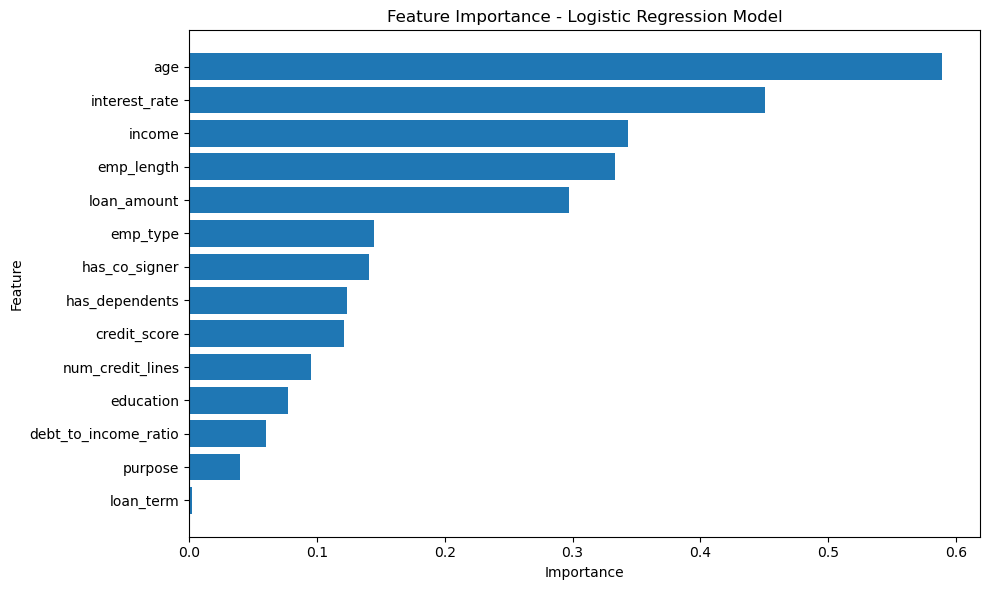

In [33]:
# Display the feature importance of the model using a horizontal bar graph
feature_importance = np.abs(logistic_model.coef_[0])
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [34]:
# Save the logistic regression model
with open('default_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

# Save the label encoders
with open('default_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoders, encoder_file)

# Save the scaler
with open('default_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


print("Model, encoders, and scaler loaded successfully!")


Model, encoders, and scaler loaded successfully!
